In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the dataset into a pandas dataframe
df=pd.read_csv('C:/Users/Rahul/Desktop/Internship/Projects/2nd phase/World happiness index.csv')

In [7]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
df.shape

(158, 12)

In [9]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Columns namely 'Country' and 'Region' are not unnecessary.

In [11]:
# Drop any unnecessary columns, such as country and region
df=df.drop(['Country','Region'],axis=1)

In [12]:
#Checking the new shape of data frame
df.shape

(158, 10)

'Happiness Rank' column is not directly related to the 'Happiness Score' and may introduce multicollinearity in the model.

In [13]:
#Dropping Happiness Rank Column too
df=df.drop(['Happiness Rank'],axis=1)

In [14]:
#Rechecking the shape of data frame
df.shape

(158, 9)

In [15]:
df.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [16]:
df.columns.tolist()

['Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

Examining whether Null values are present 

In [18]:
df.isna().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

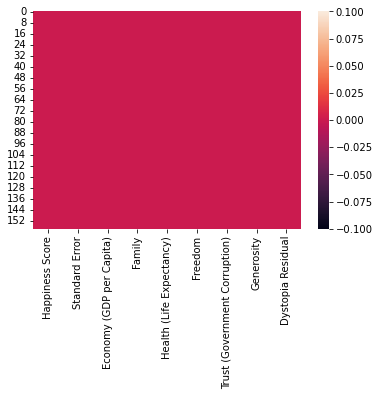

In [19]:
sns.heatmap(df.isna())

No null values found in the data

Checking for any duplicate data

In [22]:
df.duplicated(keep='first').sum()

0

No duplicate rows found

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


All the data in data frame is of float64 datatype.
No null present in data.

The Happiness Score column is our the target variable, and the other columns are features.

In [25]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [26]:
df.tail()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [29]:
#checking value counts in each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: Standard Error, Length: 153, dtype: int64


1.39651    1
0.39753    1
1.15406    1
1.02564    1
1.12094    1
          ..
1.12254    1
1.18498    1
1.14723    1
0.59325    1
0.20868    1
Name: Economy (GDP per Capita), Length: 158, dtype: int64


1.34951    1
0.43106    1
0.92933    1
0.80001    1
1.20215    1
          ..
1.12241    1
1.27385    1
1.25745    1
1.14184    1
0.13995    1
Name: Family, Length: 158, dtype: int64


0.92356    2
0.94143    1
0.60268    1
0.88213    1
0.83947    1
          ..
0.66098    1
0.64368    1
0.87337    1
0.73128    1
0.28443    1
Name: Health (Life Expectancy), Length: 157, dtype: int64


0.66557    1
0.40820    1
0.07699    1
0.339

In [43]:
df['Happiness Score'].value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

In [44]:
df['Standard Error'].value_counts()

0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: Standard Error, Length: 153, dtype: int64

In [45]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1.No null values are present in any columns

2.No negative values present

3.Most of the data is uniformly distributed.

<AxesSubplot:xlabel='Happiness Score', ylabel='Count'>

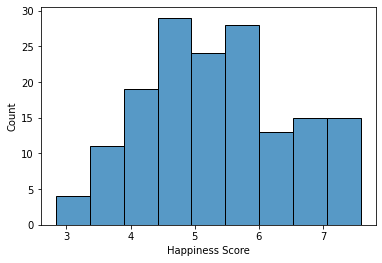

In [117]:
sns.histplot(data=df['Happiness Score'])

Data is fairly uniform.

<AxesSubplot:xlabel='Standard Error', ylabel='Count'>

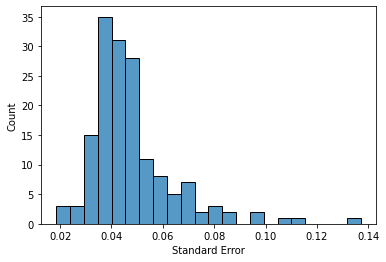

In [49]:
sns.histplot(data=df['Standard Error'])

Outliers are present in Standard Error.

Data is negatively skewed.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Count'>

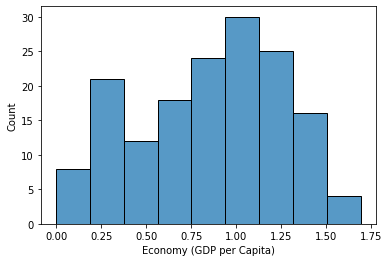

In [53]:
sns.histplot(data=df['Economy (GDP per Capita)'])

Economy is mostly uniformly distributed

<AxesSubplot:xlabel='Family', ylabel='Count'>

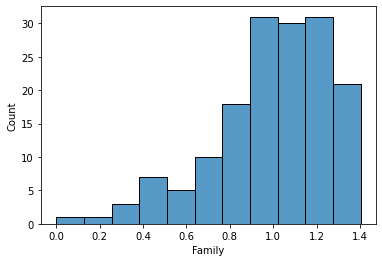

In [54]:
sns.histplot(data=df['Family'])

'Family' data is negatively skewed.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Count'>

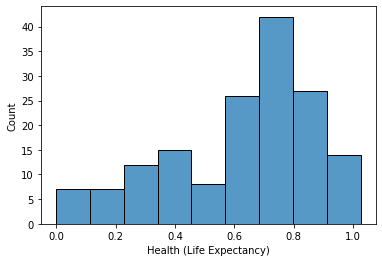

In [55]:
sns.histplot(data=df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Count'>

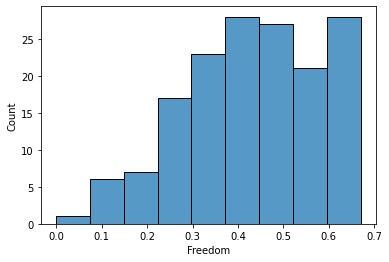

In [56]:
sns.histplot(data=df['Freedom'])

'Freedom' data is negatively skewed.

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Count'>

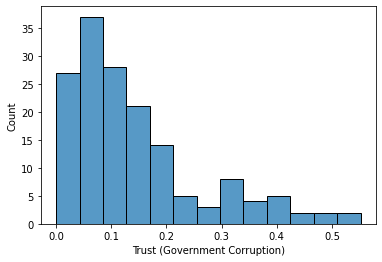

In [58]:
sns.histplot(data=df['Trust (Government Corruption)'])

Data is positively skewed.

<AxesSubplot:xlabel='Generosity', ylabel='Count'>

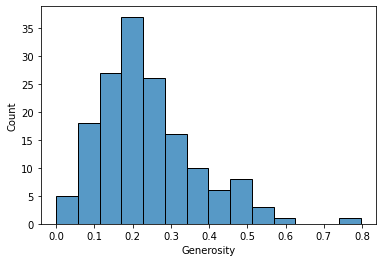

In [60]:
sns.histplot(data=df['Generosity'])

Outliers are present in data.

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Count'>

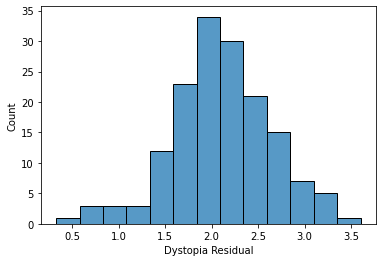

In [108]:
sns.histplot(data=df['Dystopia Residual'])

Data is uniformly distributed.

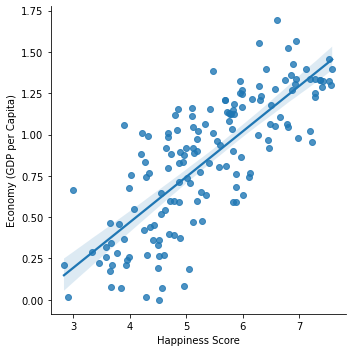

In [82]:
sns.lmplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df)

Positive correaltion found between Happiness Score & Economy (GDP per Capita).

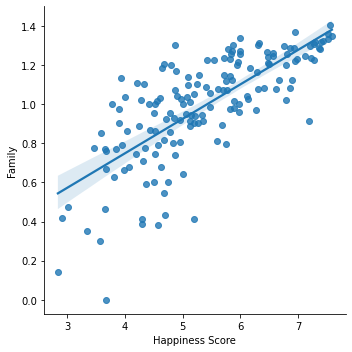

In [81]:
sns.lmplot(x='Happiness Score',y='Family',data=df)

Positive correaltion found between Happiness Score & Family.

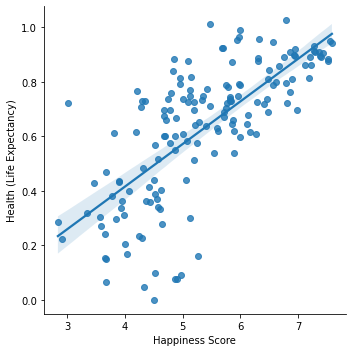

In [80]:
sns.lmplot(x='Happiness Score',y='Health (Life Expectancy)',data=df)

Positive correaltion found between Happiness Score & Health (Life Expectancy).

<AxesSubplot:xlabel='Happiness Score', ylabel='Standard Error'>

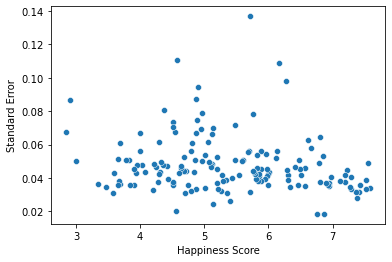

In [86]:
sns.scatterplot(x='Happiness Score',y='Standard Error',data=df)

<AxesSubplot:xlabel='Freedom', ylabel='Trust (Government Corruption)'>

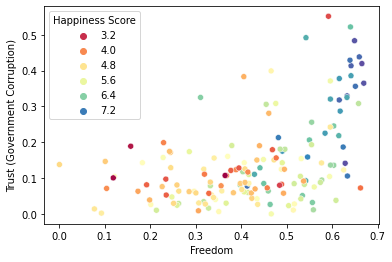

In [94]:
sns.scatterplot(x='Freedom',y='Trust (Government Corruption)',hue='Happiness Score',data=df,palette='Spectral')

<AxesSubplot:xlabel='Family', ylabel='Health (Life Expectancy)'>

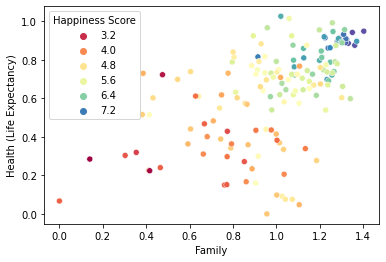

In [95]:
sns.scatterplot(x='Family',y='Health (Life Expectancy)',hue='Happiness Score',data=df,palette='Spectral')

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Dystopia Residual'>

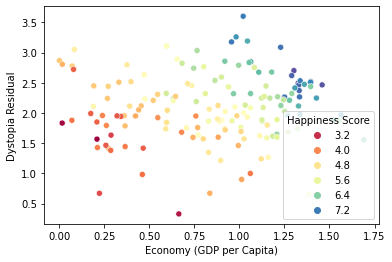

In [104]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Dystopia Residual',hue='Happiness Score',data=df,palette='Spectral')

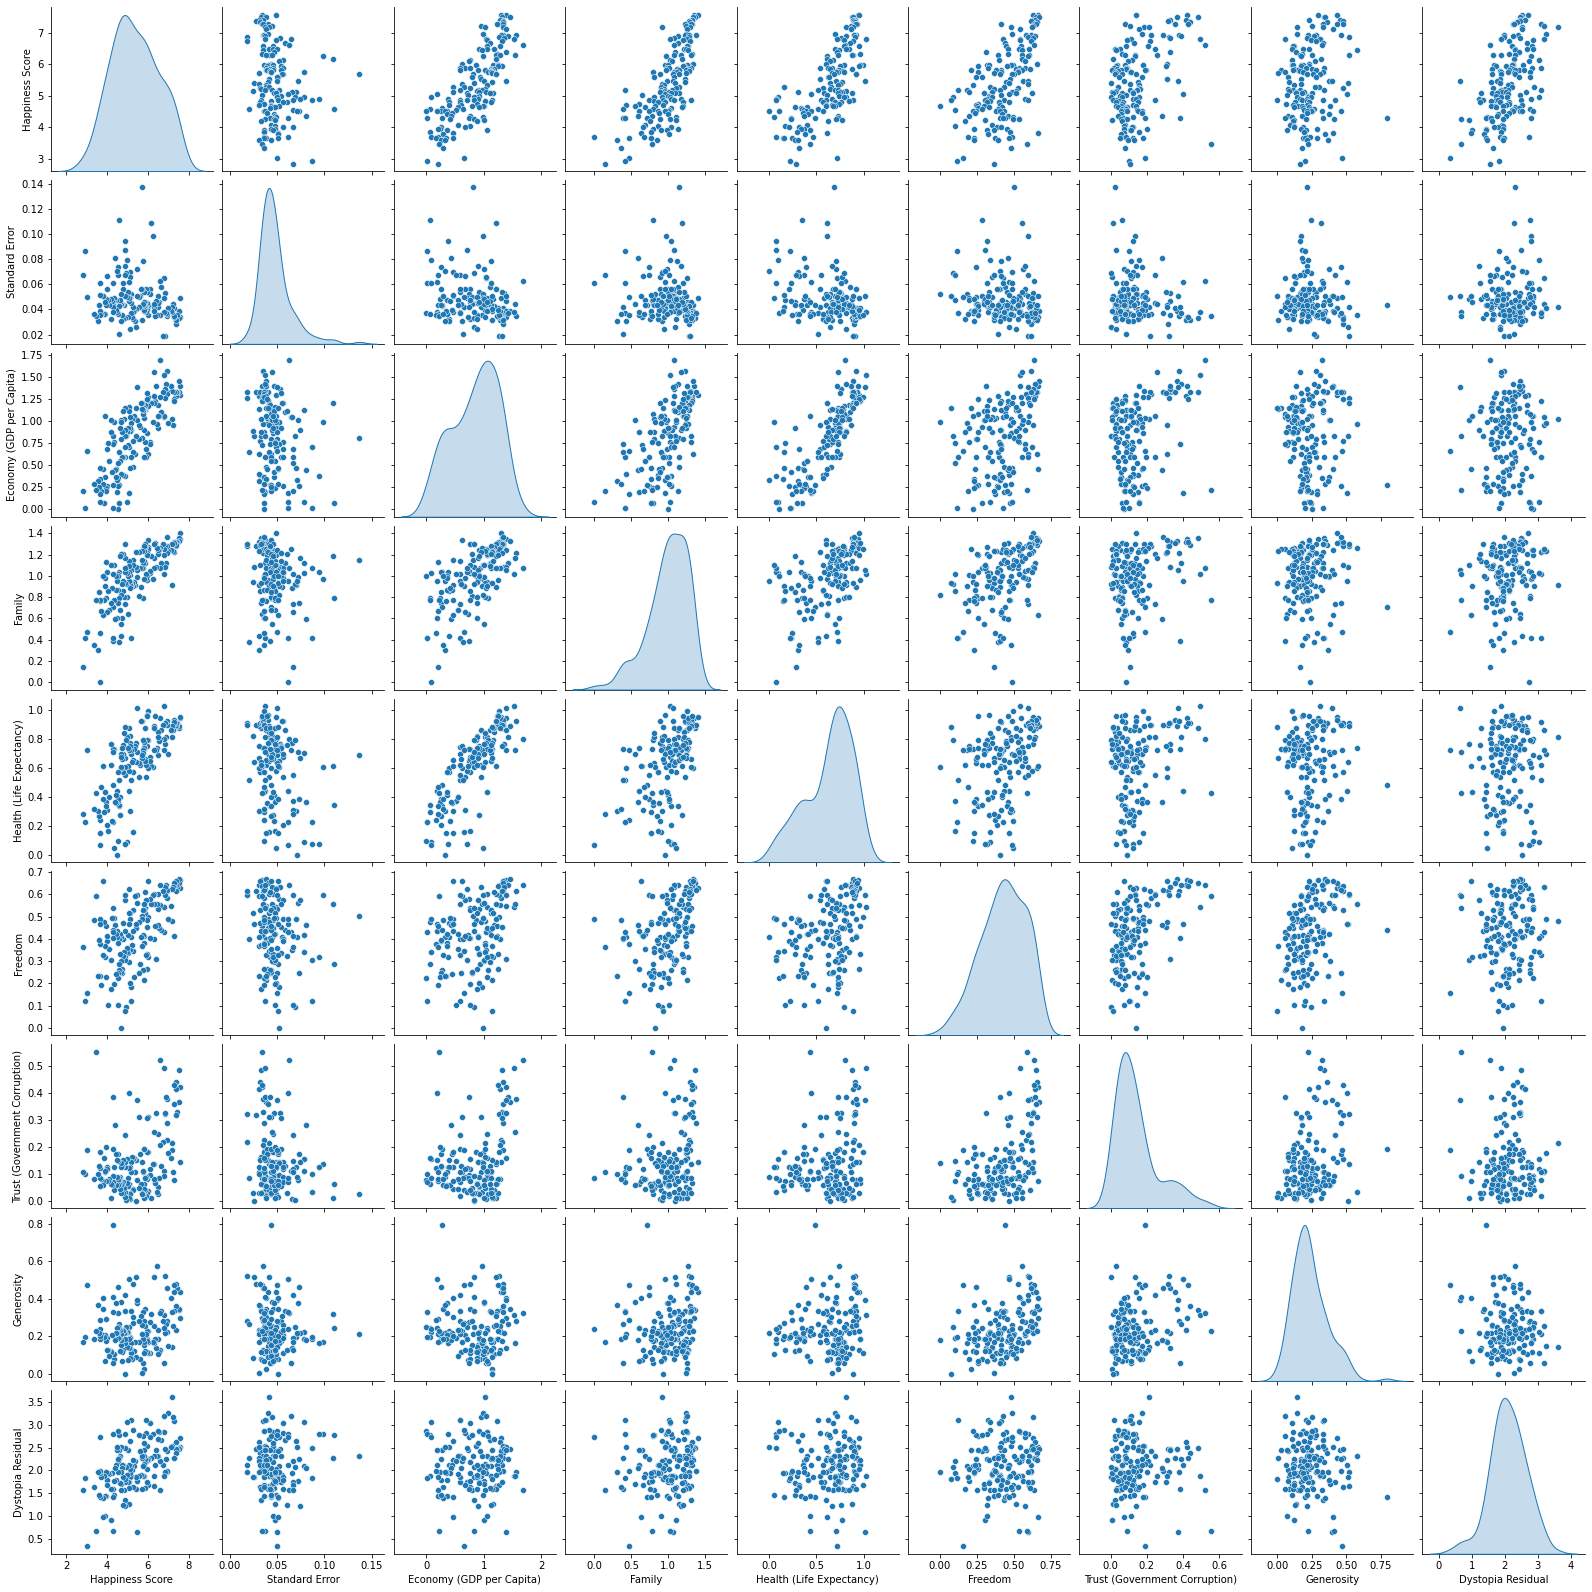

In [114]:
sns.pairplot(data=df,palette='deep',diag_kind='kde')

In [115]:
#Checking skewness
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Skewness found in Columns : 'Standard Error','Family','Health (Life Expectancy)','Trust (Government Corruption)' and 'Generosity'.

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

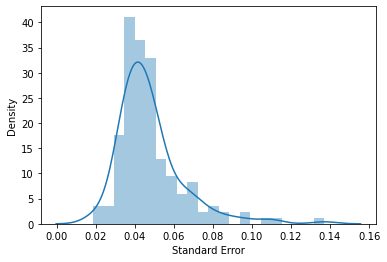

In [116]:
sns.distplot(df['Standard Error'])

1. The skewness values are relatively small and not extreme. 
2. As the data sample is small, it may not be appropriate to remove skewness as doing so could potentially lead to a loss of important information.
3. Hence not removing skewness from the data.

In [128]:
#checking corelation between varibles
cor=df.corr()

<AxesSubplot:>

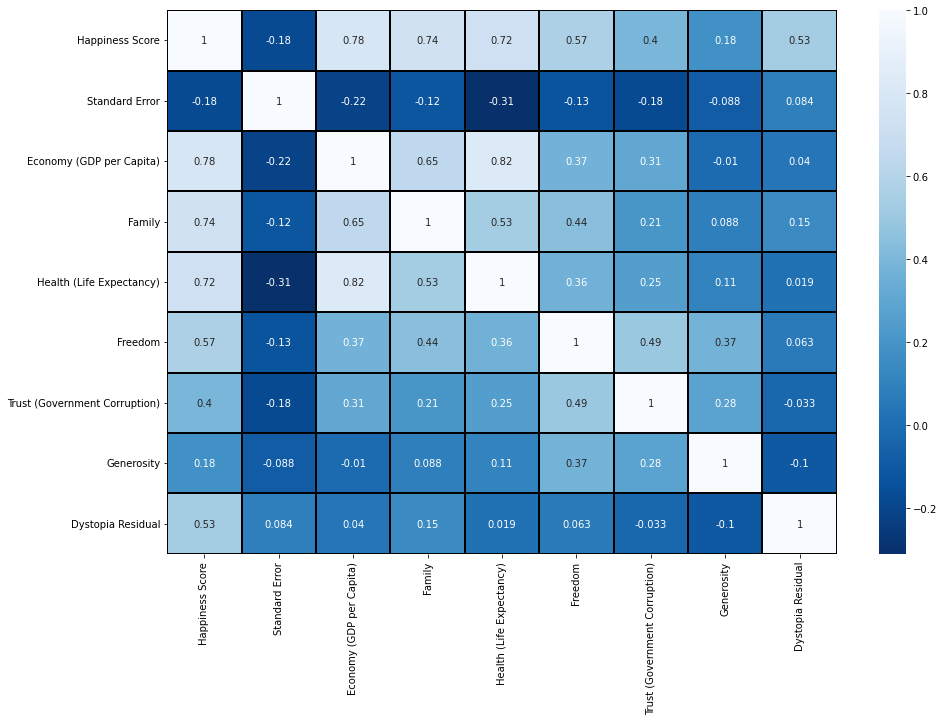

In [135]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Blues_r',linewidths=0.2,annot=True,linecolor='black')

In [130]:
cor['Happiness Score'].sort_values(ascending = False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Name: Happiness Score, dtype: float64

No perfect correlation found in data with Happiness Score.

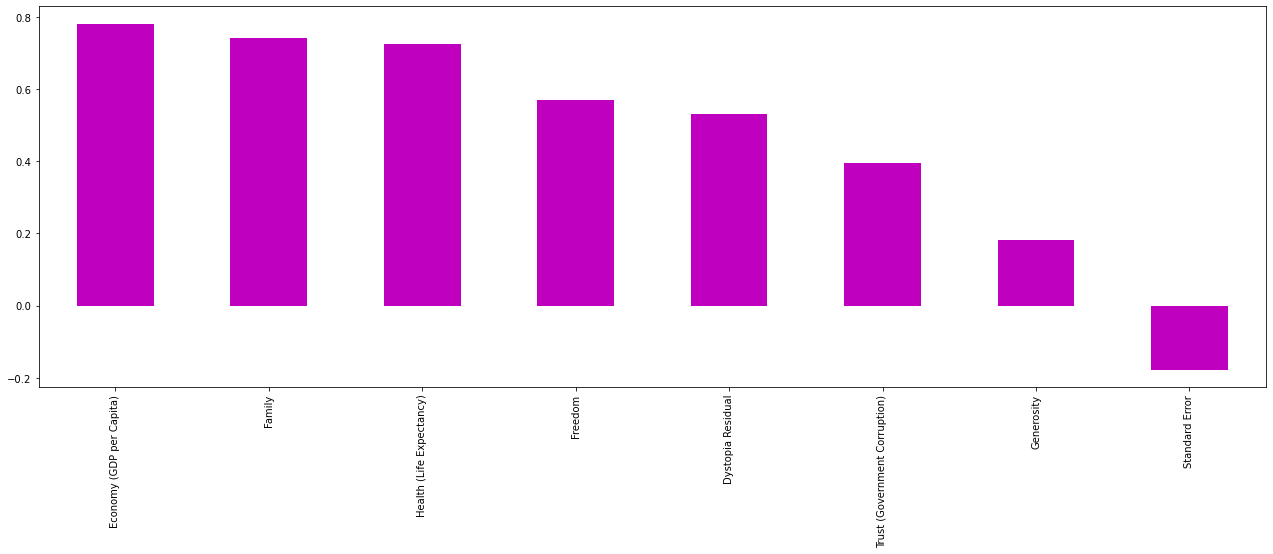

In [138]:
plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].sort_values(ascending = False).drop(['Happiness Score']).plot(kind='bar',color='m')
plt.show()

Standardization of Data

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

In [142]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [143]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...
153,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


Checking Variance Inflation Factor

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif['features']=x.columns

In [148]:
vif

,VIF Values,features
0,1.138096,Standard Error
1,4.106075,Economy (GDP per Capita)
2,1.944623,Family
3,3.336063,Health (Life Expectancy)
4,1.749657,Freedom
5,1.440034,Trust (Government Corruption)
6,1.289276,Generosity
7,1.056090,Dystopia Residual


All of the VIF values are below 5. There is no severe multicollinearity issue in the dataset.

# MODELING

In [152]:
#importin libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

Divding data in train & test parts

In [156]:
# Split the data into training and testing sets

maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print(maxAccu, maxRs)

0.9999999641035279 148


In [157]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=maxRs)

Using multiple models

In [160]:
#importing models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

Linear Regression

In [158]:
lr=LinearRegression()
lr.fit(x_train,y_train)
plr=lr.predict(x_test)
plr_train=lr.predict(x_train)
print('R2score: ',r2_score(y_test,plr))
print('R2score on training data: ',r2_score(y_train,plr_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,plr))
print('Mean Squared error :',mean_squared_error(y_test,plr))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,plr)))

R2score:  0.9999999641035279
R2score on training data:  99.99999240714624
Mean absolute error:  0.0002169302964087627
Mean Squared error : 6.470205217596237e-08
Root mean squared error : 0.0002543659807756579


Random Forest Regression

In [161]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
prfr=rfr.predict(x_test)
prfr_train=rfr.predict(x_train)
print('R2score: ',r2_score(y_test,prfr))
print('R2score on training data: ',r2_score(y_train,prfr_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,prfr))
print('Mean Squared error :',mean_squared_error(y_test,prfr))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,prfr)))

R2score:  0.8459985308210394
R2score on training data:  98.61024341465512
Mean absolute error:  0.41625125000000035
Mean Squared error : 0.277581904154167
Root mean squared error : 0.5268604218900552


Decision Tree Regression

In [162]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pdtr=dtr.predict(x_test)
pdtr_train=dtr.predict(x_train)
print('R2score: ',r2_score(y_test,pdtr))
print('R2score on training data: ',r2_score(y_train,pdtr_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,pdtr))
print('Mean Squared error :',mean_squared_error(y_test,pdtr))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,pdtr)))

R2score:  0.800457949066283
R2score on training data:  100.0
Mean absolute error:  0.4582708333333334
Mean Squared error : 0.3596671041666668
Root mean squared error : 0.5997225226441532


K Nearest Neighbors

In [163]:
knn=KNN()
knn.fit(x_train,y_train)
pknn=knn.predict(x_test)
pknn_train=knn.predict(x_train)
print('R2score: ',r2_score(y_test,pknn))
print('R2score on training data: ',r2_score(y_train,pknn_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,pknn))
print('Mean Squared error :',mean_squared_error(y_test,pknn))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,pknn)))

R2score:  0.8939841862731718
R2score on training data:  91.40110528708234
Mean absolute error:  0.34649999999999986
Mean Squared error : 0.19108954999999994
Root mean squared error : 0.4371379073015745


Lasso Regression

In [164]:
ls=Lasso()
ls.fit(x_train,y_train)
pls=ls.predict(x_test)
pls_train=ls.predict(x_train)
print('R2score: ',r2_score(y_test,pls))
print('R2score on training data: ',r2_score(y_train,pls_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,pls))
print('Mean Squared error :',mean_squared_error(y_test,pls))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,pls)))

R2score:  -0.0005616206521210643
R2score on training data:  0.0
Mean absolute error:  1.1953916666666664
Mean Squared error : 1.8034750016666665
Root mean squared error : 1.3429352187155814


Ridge Regression

In [165]:
rd=Ridge()
rd.fit(x_train,y_train)
prd=rd.predict(x_test)
prd_train=rd.predict(x_train)
print('R2score: ',r2_score(y_test,prd))
print('R2score on training data: ',r2_score(y_train,prd_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,prd))
print('Mean Squared error :',mean_squared_error(y_test,prd))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,prd)))

R2score:  0.9999576882519546
R2score on training data:  99.9955953752259
Mean absolute error:  0.007421135141769804
Mean Squared error : 7.626534768225594e-05
Root mean squared error : 0.008733003359798732


Selecting the Best model

In [166]:
from sklearn.model_selection import cross_val_score

For LR

In [167]:
scr=cross_val_score(lr,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[0.99999945 0.99999834 0.99999836 0.99999535 0.99999943]
0.9999981871007761
Diff b/w R2 score & CV score 0.00017770027517238773


FOR RFR

In [169]:
scr=cross_val_score(rfr,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100) 

[-7.37938666 -1.1484292  -0.65591624 -1.82822887 -5.42592634]
-3.287577461942996
Diff b/w R2 score & CV score 428.7577426046524


For DTR

In [170]:
scr=cross_val_score(dtr,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[ -6.01509203  -7.65448217  -8.09714438 -10.04726717  -5.90366242]
-7.543529633598508
Diff b/w R2 score & CV score 854.3529597702037


FOR KNN

In [171]:
scr=cross_val_score(knn,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[-9.12505934 -2.54057731 -2.74178757 -5.33740155 -5.29181672]
-5.007328497616674
Diff b/w R2 score & CV score 600.7328461720202


FOR LS

In [172]:
scr=cross_val_score(ls,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[-39.5383371  -12.7569766   -0.20386211 -30.73906532 -23.65659767]
-21.378967758942114
Diff b/w R2 score & CV score 2237.896772304564


For RD

In [173]:
scr=cross_val_score(rd,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[0.99561946 0.9996307  0.99955146 0.99933927 0.99810782]
0.9984497411343913
Diff b/w R2 score & CV score 0.15502229691365388


Linear Regression is our best model.

# Hyperparameter Tuning

In [189]:
#importing GridseachCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

Parmaters of Linear Regression

In [193]:
param={'fit_intercept':[True,False],
       'copy_X':[True,False],
       'n_jobs':[5,10,20,40,50,200],
       'positive':[False,True],
      }

In [194]:
gscv = GridSearchCV(LinearRegression(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [5, 10, 20, 40, 50, 200],
                         'positive': [False, True]})

In [195]:
gscv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 5, 'positive': True}

These are the best performing parameters for the model.

In [200]:
#Creating the final model
Final_model=LinearRegression(fit_intercept=True, positive=False, copy_X= True, n_jobs= 5)

In [201]:
#Training the final model
Final_model.fit(x_train,y_train)

LinearRegression(n_jobs=5)

In [202]:
#Final prediction
pred=Final_model.predict(x_test)
print('R2score: ',r2_score(y_test,pred))
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error :',mean_squared_error(y_test,pred))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

R2score:  0.9999999641035279
Mean absolute error:  0.0002169302964087627
Mean Squared error : 6.470205217596237e-08
Root mean squared error : 0.0002543659807756579


The final prediction model accuracy is 99.99%.

In [206]:
#Saving our model
import joblib
joblib.dump(Final_model,'World Happiness model.pkl')

['World Happiness model.pkl']

In [207]:
#checking if our saved model is working
model = joblib.load('World Happiness model.pkl')

prediction=model.predict(x_test)
prediction

array([4.19434346, 4.51781684, 6.81023013, 5.01309407, 4.50720395,
       4.27066363, 7.52701688, 6.78620475, 6.79777047, 4.89756747,
       4.07677292, 6.75012827, 3.89657483, 3.66725903, 7.22564804,
       5.83273192, 5.98709822, 4.85765591, 5.87828533, 4.56467091,
       7.28598847, 6.93734686, 5.70879757, 6.66965503, 6.29816172,
       2.83892886, 3.68089831, 5.05720615, 3.34001504, 3.6777401 ,
       3.9888383 , 5.82824063, 3.93080442, 4.86720167, 7.19979373,
       4.30690075, 7.1872786 , 3.00632294, 7.27768044, 4.87594888,
       6.26921281, 5.47699043, 4.97111373, 7.52215762, 3.84498095,
       6.41122311, 6.12272917, 4.33215455])